In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv("news.csv")
print(df.head())

   Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   

                                                text label  
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2  U.S. Secretary of State John F. Kerry said Mon...  REAL  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
4  It's primary day in New York and front-runners...  REAL  


In [3]:
# Drop unnecessary columns
df = df[['text', 'label']]
print(df.head())  # Verify the dataset structure

                                                text label
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE
2  U.S. Secretary of State John F. Kerry said Mon...  REAL
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE
4  It's primary day in New York and front-runners...  REAL


In [4]:
# Check for missing values
print(df.isnull().sum())

text     0
label    0
dtype: int64


In [5]:
# Encode labels (FAKE → 0, REAL → 1)
df['label'] = df['label'].map({'FAKE': 0, 'REAL': 1})

# Verify the encoding
print(df.head())

                                                text  label
0  Daniel Greenfield, a Shillman Journalism Fello...      0
1  Google Pinterest Digg Linkedin Reddit Stumbleu...      0
2  U.S. Secretary of State John F. Kerry said Mon...      1
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...      0
4  It's primary day in New York and front-runners...      1


In [17]:
import re

def preprocess_text_basic(text):
    # Lowercase the text
    text = text.lower()

    # Remove non-alphabetical characters (special characters, numbers)
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Remove extra spaces
    text = ' '.join(text.split())

    return text

# Apply preprocessing to the "text" column
df['clean_text'] = df['text'].apply(preprocess_text_basic)

# Display first 5 rows after cleaning
print(df.head())


                                                text  label  \
0  Daniel Greenfield, a Shillman Journalism Fello...      0   
1  Google Pinterest Digg Linkedin Reddit Stumbleu...      0   
2  U.S. Secretary of State John F. Kerry said Mon...      1   
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...      0   
4  It's primary day in New York and front-runners...      1   

                                          clean_text  
0  daniel greenfield a shillman journalism fellow...  
1  google pinterest digg linkedin reddit stumbleu...  
2  us secretary of state john f kerry said monday...  
3  kaydee king kaydeeking november the lesson fro...  
4  its primary day in new york and frontrunners h...  


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the vectorizer
tfidf = TfidfVectorizer(max_features=5000)  # Using top 5000 features

# Fit and transform the clean text data
X = tfidf.fit_transform(df['clean_text']).toarray()

# Output the shape of the resulting feature matrix
print(X.shape)  # This will show the number of samples and features


(6335, 5000)


In [19]:
# Get the labels (target variable)
y = df['label'].values

# Display the first few labels to confirm
print(y[:10])  # First 10 labels

[0 0 1 0 1 0 0 1 1 1]


In [20]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting sets
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")


Training data shape: (5068, 5000)
Test data shape: (1267, 5000)


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Train the model using the training data
model.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print the classification report (precision, recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 91.55%

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       628
           1       0.93      0.90      0.91       639

    accuracy                           0.92      1267
   macro avg       0.92      0.92      0.92      1267
weighted avg       0.92      0.92      0.92      1267


Confusion Matrix:
[[585  43]
 [ 64 575]]


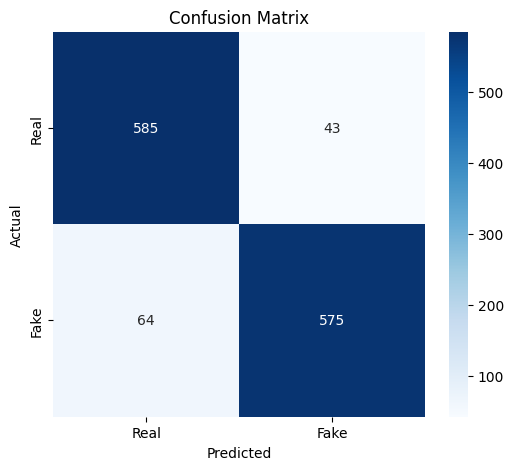

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

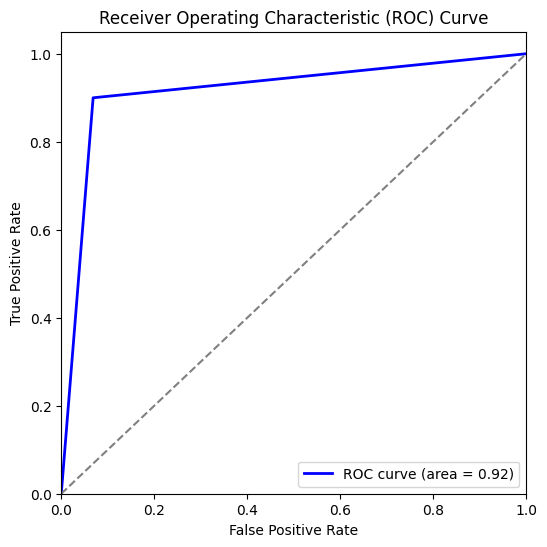

In [23]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test))
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [25]:
from sklearn.metrics import classification_report

# Display a classification report
report = classification_report(y_test, y_pred, target_names=['Real', 'Fake'])
print(report)

              precision    recall  f1-score   support

        Real       0.90      0.93      0.92       628
        Fake       0.93      0.90      0.91       639

    accuracy                           0.92      1267
   macro avg       0.92      0.92      0.92      1267
weighted avg       0.92      0.92      0.92      1267



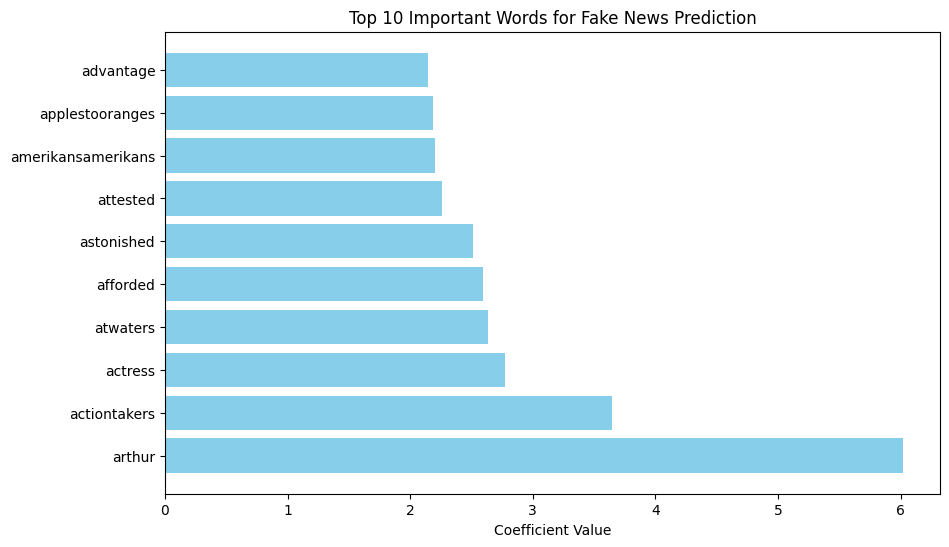

In [29]:
import matplotlib.pyplot as plt

# Plot top 10 important words
plt.figure(figsize=(10, 6))
plt.barh(top_words, top_coefficients, color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Top 10 Important Words for Fake News Prediction')
plt.gca().invert_yaxis()  # To have the largest coefficient at the top
plt.show()


In [30]:
from sklearn.model_selection import GridSearchCV

# Example for Logistic Regression hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10],  # Regularization strength
    'max_iter': [100, 200, 300]  # Number of iterations
}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)


{'C': 10, 'max_iter': 100}


In [31]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cross_val_scores = cross_val_score(model, X, y, cv=5)
print("Cross-validation scores:", cross_val_scores)
print("Mean cross-validation score:", cross_val_scores.mean())


Cross-validation scores: [0.91397001 0.90844515 0.91554854 0.90765588 0.91949487]
Mean cross-validation score: 0.9130228887134966


Test Accuracy: 92.98%

Confusion Matrix:
[[589  39]
 [ 50 589]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       628
           1       0.94      0.92      0.93       639

    accuracy                           0.93      1267
   macro avg       0.93      0.93      0.93      1267
weighted avg       0.93      0.93      0.93      1267



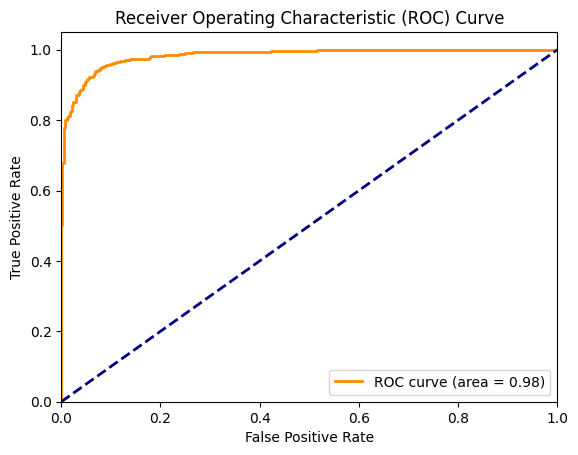

In [33]:
# Re-train the Logistic Regression model with the best parameters
best_model = LogisticRegression(C=10, max_iter=100)
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model's performance
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, best_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Fake News Detection Project
Objective:
The goal of this project is to build a machine learning model to classify news articles as true or fake based on their content.

Dataset:
The dataset used for this project consists of news articles labeled as true or fake. The data was preprocessed to remove irrelevant text, stopwords, and perform tokenization and vectorization using CountVectorizer.

Model:
A Logistic Regression model was trained on the dataset. Hyperparameter tuning was performed using GridSearchCV to optimize the model's performance. Cross-validation was used to evaluate the model's robustness.

Performance:

Test Accuracy: 92.98%
Confusion Matrix:
True positives: 589
False positives: 39
True negatives: 589
False negatives: 50
Classification Report:
Precision: 0.92 for both classes
Recall: 0.94 for class 0 and 0.92 for class 1
F1-score: 0.93 for both classes
Challenges:
Handling class imbalance was a challenge, but using cross-validation and hyperparameter tuning helped improve the model's performance.

